In [1]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_validation_curve(x_train, y_train, x_val, y_val, classifier_class, param_name, param_range, title):
    train_scores = []
    val_scores = []
    for param in param_range:
        classifier = classifier_class(**{param_name: param})
        print(f"training with {param_name}={param}")
        classifier.fit(x_train, y_train)
        print("done training")
        train_prediction = classifier.predict(x_train)
        val_prediction = classifier.predict(x_val)
        # calculate f1 score
        train_score = f1_score(y_train, train_prediction, average='macro')
        val_score = f1_score(y_val, val_prediction, average='macro')
        print(f"train score: {train_score}, val score: {val_score}")
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.subplots_adjust(bottom=0.55)

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xscale('log',base=10)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Parameter C')
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.plot(param_range, train_scores,linestyle='--', marker='o', color='r', label='Training score')
    ax.plot(param_range, val_scores, linestyle='--', marker='x',color='g', label='Validation score')
    ax.legend()
    plt.tight_layout()
    # save figure
    fig.savefig(f"graphics/validation_curve_{title}.pdf", dpi=300)


In [2]:
# load data
train_data = pd.read_feather("train_embedding_bert_swiss_lm.feather")
dev_data = pd.read_feather("dev_embedding_bert_swiss_lm.feather")

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

plot_validation_curve(np.stack(train_data['sentence_embedding_first_state'].tolist()), np.stack(train_data['label'].tolist()),
                      dev_data['sentence_embedding_first_state'].tolist(), dev_data['label'].tolist(),
                      classifier_class=SVC, param_name='C', param_range=np.logspace(1,-2 , 4), title="BERT-embedding SVC(C)")




tf-idf vocab size: 680
training with C=10.0
done training
train score: 0.9983046877449282, val score: 0.6130928128360011
training with C=1.0
done training
train score: 0.9467675696925111, val score: 0.6053392209123499
training with C=0.1
done training
train score: 0.7132806925387206, val score: 0.5398713612360664
training with C=0.01
done training
train score: 0.10661744448729958, val score: 0.0853167337971439


<Figure size 640x480 with 0 Axes>

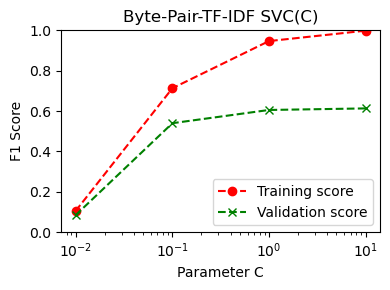

In [21]:
from byte_pair_tfidf_vectorizer import BytePairTfidfVectorizer

byte_pair_tfidf_vectorizer = BytePairTfidfVectorizer(vocab_size=1000, min_frequency=2)
byte_pair_vectorized = byte_pair_tfidf_vectorizer.fit_transform(train_data["text"].tolist())
dev_byte_pair_vectorized = byte_pair_tfidf_vectorizer.transform(dev_data["text"].tolist())

plot_validation_curve(byte_pair_vectorized, np.stack(train_data['label'].tolist()),
                      dev_byte_pair_vectorized, dev_data['label'].tolist(),
                      classifier_class=SVC, param_name='C', param_range=np.logspace(1,-2 , 4), title="Byte-Pair-TF-IDF SVC(C)")




tf-idf vocab size: 680
training with C=100.0


/Users/raphael/opt/miniconda3/envs/swiss_dial/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


done training
train score: 0.7611439093369585, val score: 0.6028225791846538
training with C=10.0
done training
train score: 0.7624756183602868, val score: 0.608540924336931
training with C=1.0
done training
train score: 0.7598471605543646, val score: 0.6091576586553051
training with C=0.1
done training
train score: 0.7444986107464735, val score: 0.6056068462397304
training with C=0.01
done training
train score: 0.7065858412093882, val score: 0.5889096626798505
training with C=0.001
done training
train score: 0.5560795986601518, val score: 0.439019375910514


<Figure size 640x480 with 0 Axes>

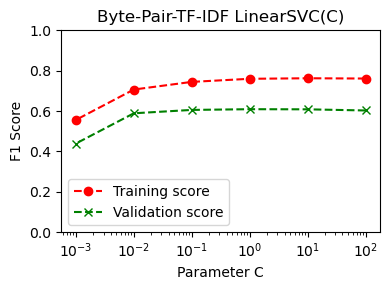

In [19]:
from byte_pair_tfidf_vectorizer import BytePairTfidfVectorizer

byte_pair_tfidf_vectorizer = BytePairTfidfVectorizer(vocab_size=1000, min_frequency=2)
byte_pair_vectorized = byte_pair_tfidf_vectorizer.fit_transform(train_data["text"].tolist())
dev_byte_pair_vectorized = byte_pair_tfidf_vectorizer.transform(dev_data["text"].tolist())

plot_validation_curve(byte_pair_vectorized, np.stack(train_data['label'].tolist()),
                      dev_byte_pair_vectorized, dev_data['label'].tolist(),
                      classifier_class=LinearSVC, param_name='C', param_range=np.logspace(2,-3 , 6), title="Byte-Pair-TF-IDF LinearSVC(C)")

training with C=1.0
done training
train score: 0.9996406050842929, val score: 0.3115135981869328
training with C=0.1
done training
train score: 0.9976010252652436, val score: 0.2419971693907107
training with C=0.01
done training
train score: 0.9940390582816926, val score: 0.168145306051258
training with C=0.001
done training
train score: 0.10661744448729958, val score: 0.0853167337971439
training with C=0.0001
done training
train score: 0.10661744448729958, val score: 0.0853167337971439
training with C=1e-05
done training
train score: 0.10661744448729958, val score: 0.0853167337971439


<Figure size 640x480 with 0 Axes>

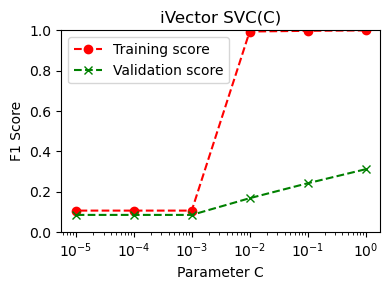

In [14]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

plot_validation_curve(np.stack(train_data['audio'].tolist()), np.stack(train_data['label'].tolist()),
                      dev_data['audio'].tolist(), dev_data['label'].tolist(),
                      classifier_class=SVC, param_name='C', param_range=np.logspace(0,-5 , 6), title="iVector SVC(C)")

training with C=0.001
done training
train score: 0.10661744448729958, val score: 0.0853167337971439
training with C=0.01
done training
train score: 0.9940390582816926, val score: 0.168145306051258
training with C=0.1
done training
train score: 0.9976010252652436, val score: 0.2419971693907107
training with C=1.0
done training
train score: 0.9996406050842929, val score: 0.3115135981869328
training with C=10.0
done training
train score: 1.0, val score: 0.3181569232432855
training with C=100.0
done training
train score: 1.0, val score: 0.3256429135249399


<Figure size 640x480 with 0 Axes>

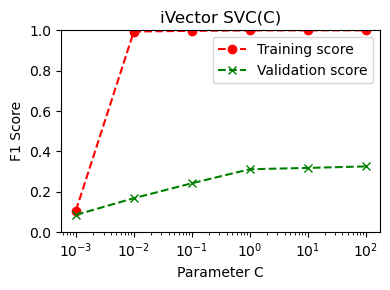

In [18]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

plot_validation_curve(np.stack(train_data['audio'].tolist()), np.stack(train_data['label'].tolist()),
                      dev_data['audio'].tolist(), dev_data['label'].tolist(),
                      classifier_class=SVC, param_name='C', param_range=np.logspace(-3,2 , 6), title="iVector SVC(C)")

training with C=1.0


/Users/raphael/opt/miniconda3/envs/swiss_dial/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


done training
train score: 0.9918462655575244, val score: 0.30844281251462935
training with C=0.1
done training
train score: 0.9916370846479546, val score: 0.31362788332921365
training with C=0.01
done training
train score: 0.9912929393972874, val score: 0.3208190126896459
training with C=0.001
done training
train score: 0.9907823387218928, val score: 0.3161514913390495
training with C=0.0001
done training
train score: 0.9896179651060332, val score: 0.3284358472087344
training with C=1e-05
done training
train score: 0.9822018490528385, val score: 0.33301408009030214


<Figure size 640x480 with 0 Axes>

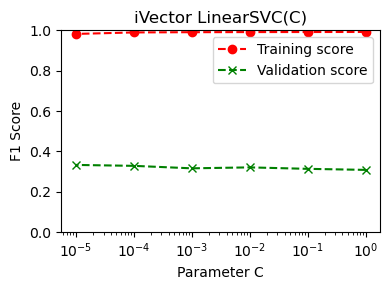

In [15]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

plot_validation_curve(np.stack(train_data['audio'].tolist()), np.stack(train_data['label'].tolist()),
                      dev_data['audio'].tolist(), dev_data['label'].tolist(),
                      classifier_class=LinearSVC, param_name='C', param_range=np.logspace(0,-5 , 6), title="iVector LinearSVC(C)")

In [4]:
np.logspace(0, 0, 1)

array([1.])

In [5]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
my_linear_svc = SVC()
my_linear_svc.fit(train_data['sentence_embedding_first_state'].tolist(), train_data['label'].tolist())
my_linear_svc.predict(dev_data['sentence_embedding_first_state'].tolist())

array(['LU', 'BS', 'LU', ..., 'BS', 'ZH', 'ZH'], dtype='<U2')

316



tf-idf vocab size: 56
training with vocab_size=316
done training
train score: 0.48479649627470156, val score: 0.40320760139895095
10000



tf-idf vocab size: 8104
training with vocab_size=10000
done training
train score: 0.962391227027737, val score: 0.6148597782264111


<Figure size 640x480 with 0 Axes>

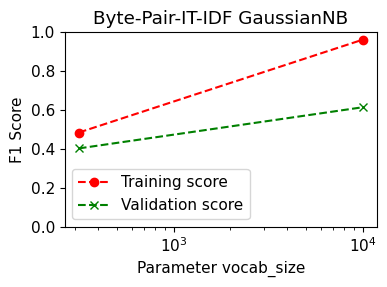

In [38]:
def plot_validation_curve_gaussian():
    train_scores = []
    val_scores = []
    param_range = np.logspace(2.5, 4, 2)
    for param in param_range:
        param = int(param)
        print(param)
        byte_pair_tfidf_vectorizer = BytePairTfidfVectorizer(vocab_size=param, min_frequency=2)
        byte_pair_vectorized = byte_pair_tfidf_vectorizer.fit_transform(train_data["text"].tolist())
        dev_byte_pair_vectorized = byte_pair_tfidf_vectorizer.transform(dev_data["text"].tolist())
        classifier = LinearSVC()
        print(f"training with vocab_size={param}")
        classifier.fit(byte_pair_vectorized, train_data['label'].tolist())
        print("done training")
        train_prediction = classifier.predict(byte_pair_vectorized)
        val_prediction = classifier.predict(dev_byte_pair_vectorized)
        # calculate f1 score
        train_score = f1_score(train_data['label'].tolist(), train_prediction, average='macro')
        val_score = f1_score(dev_data['label'].tolist(), val_prediction, average='macro')
        print(f"train score: {train_score}, val score: {val_score}")
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.subplots_adjust(bottom=0.55)
    plt.rcParams.update({'font.size': 11}) # Change 14 to your desired font size

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_xscale('log',base=10)
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Parameter vocab_size')
    ax.set_title("Byte-Pair-IT-IDF GaussianNB")
    ax.set_ylim([0, 1])
    ax.plot(param_range, train_scores,linestyle='--', marker='o', color='r', label='Training score')
    ax.plot(param_range, val_scores, linestyle='--', marker='x',color='g', label='Validation score')
    ax.legend()
    plt.tight_layout()
    # save figure
    fig.savefig(f"graphics/validation_curve_Byte-Pair-IT-IDF GaussianNB.pdf", dpi=300)
plot_validation_curve_gaussian()

In [31]:
train_data['audio'].tolist()[0].shape

(400,)